In [1]:
# Imports

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
#Load a vision benchmark dataset (We will start with the MNIST hand-written numeric digits dataset.)

dataset_name = "mnist"

if dataset_name == "cifar10":
    dataset = tf.keras.datasets.cifar10
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
      # CIFAR10 images are 32*32*3.
    accuracy_threshold = 0.6       # Moodle progress checker expects >60% accuracy on CIFAR10
    
elif dataset_name == "fashion":
    dataset = tf.keras.datasets.fashion_mnist
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    accuracy_threshold = 0.8
    
elif dataset_name == "mnist":
    accuracy_threshold = 0.96      # Moodle progress checker expects >96% accuracy on MNIST.
    dataset = tf.keras.datasets.mnist
    class_names = ['zero', 'one', 'two', 'three', 'four','five', 'six', 'seven', 'eight', 'nine']
    
else:
    print("unknown dataset")
    raise Exception("Please specify a valid dataset!")

(train_images0, train_labels0), (test_images0, test_labels0) = dataset.load_data()

print('Train: X=%s, y=%s' % (train_images0.shape, train_labels0.shape))
print('Test: X=%s, y=%s' % (test_images0.shape, test_labels0.shape))

train_labels = train_labels0.reshape(-1)
test_labels = test_labels0.reshape(-1)

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


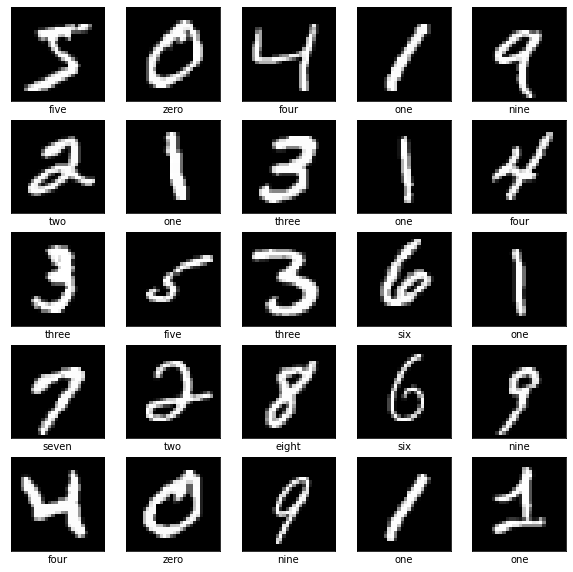

In [4]:
#Visualise the Dataset

# plot a few images
plt.figure(figsize=(10,10))
for i in range(25):
    
    # define subplot
    plt.subplot(5,5,i+1)
    
    # plot raw pixel data
    plt.imshow(train_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names != None:
        # Add a label underneath, if we have one...
        plt.xlabel(class_names[train_labels[i]])
        
plt.show()

In [5]:
#Prep the data
#The keras datasets contain integer pixel intensities from 0 to 255. We must rescale this to floats from 0 to 1.

# Rescale greyscale from 8 bit to floating point (by dividing by 255)
test_images = (test_images0 / 255.0).astype(np.float32)        # 10000 test patterns, shape 10000*28*28 (10000 images, 28 px in y, 28 px in x)
train_images = (train_images0 / 255.0).astype(np.float32)      # 60000 train patterns, shape 60000*28*28

if len(train_images.shape) == 3:       # images must be rank-4 tensors [number_of_images, dimension1, dimension2, number_of_channels]
   
 # add a single channel to these black-and-white images:
    
    train_images=train_images.reshape(list(train_images.shape)+[1])
    test_images=test_images.reshape(list(test_images.shape)+[1])
    
    print("Reshaped images from ", train_images0.shape, "to", train_images.shape, "so that 'channel' dimension exists")

num_classification_categories = train_labels.max() + 1


Reshaped images from  (60000, 28, 28) to (60000, 28, 28, 1) so that 'channel' dimension exists


In [30]:
#Define a model

# build model with CNN architecture
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=3, activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=3, kernel_size=3, activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classification_categories, activation='softmax'))

In [7]:
#View Model Summary

model.build(input_shape=(None,) + train_images.shape[1:])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 3)         165       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 3)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 147)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [9]:
if model.count_params() > 800000 and dataset_name == "cifar10":
    print("The lab7 quiz has a 10MB limit on your model size, so use a smaller model if you want to validate through the auto-marker!")

In [10]:
#Train the network

optimizer = keras.optimizers.Adam()

model.compile(optimizer=optimizer,  
              loss=keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                batch_size=128,
                epochs=5,
                validation_data=(test_images, test_labels))


Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: 0.5156 - accuracy: 0.8432 - val_loss: 0.2099 - val_accuracy: 0.9363
Epoch 2/5
469/469 [==============================] - 9s 18ms/step - loss: 0.1761 - accuracy: 0.9469 - val_loss: 0.1482 - val_accuracy: 0.9531
Epoch 3/5
469/469 [==============================] - 9s 20ms/step - loss: 0.1258 - accuracy: 0.9610 - val_loss: 0.0976 - val_accuracy: 0.9703
Epoch 4/5
469/469 [==============================] - 12s 26ms/step - loss: 0.0988 - accuracy: 0.9699 - val_loss: 0.0862 - val_accuracy: 0.9728
Epoch 5/5
469/469 [==============================] - 12s 25ms/step - loss: 0.0818 - accuracy: 0.9745 - val_loss: 0.0844 - val_accuracy: 0.9725


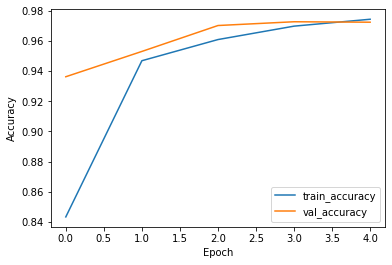

In [11]:
#Plot graphs of learning progress...

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

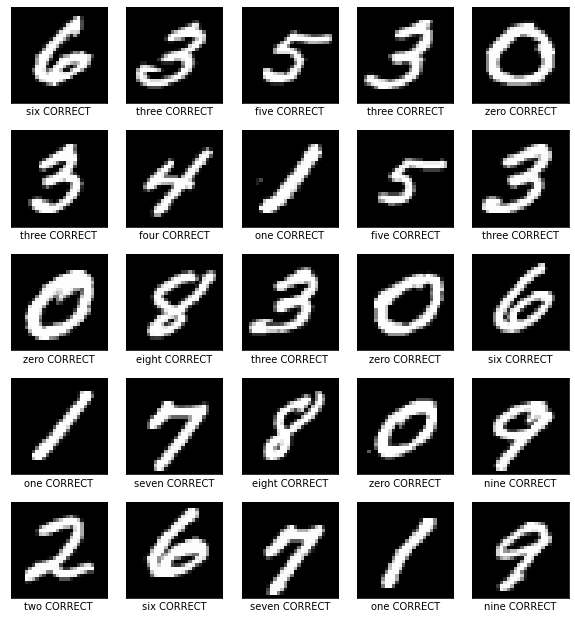

In [12]:
#Inspect how well the system is working...

plt.figure(figsize=(10,11))

# plot 25 random images from the test set:
first_index = np.random.randint(len(test_images)-25)

for i in range(first_index,first_index+25):
         # define subplot
    plt.subplot(5,5,i+1-first_index)
         # plot raw pixel data
    plt.imshow(test_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names != None:
              # Add a label underneath, if we have one...
              # array of the probabilities of belonging to each class:
        prediction = model(test_images[i:i+1])[0,:]  
              # position of the max probability in the array:
        prediction_class = np.argmax(prediction)   
        
        true_label = test_labels[i]
        class_name = class_names[prediction_class]
        
        plt.xlabel(class_name+" "+("CORRECT" if prediction_class==true_label else "WRONG\n{}".format(class_names[true_label])))
plt.subplots_adjust(hspace=0.2)
plt.show()

In [13]:
#Save the model

if history.history["val_accuracy"][-1] > accuracy_threshold:
    print("Your model is accurate enough!")
    
    # Save the model into a local folder:
    keras.models.save_model(model, "Model1"+dataset_name+".h5",save_format='h5')
else:
    print("Accuracy is below the threshold!")
    raise Exception("Your model isn't accurate enough to pass the progress checker!")

Your model is accurate enough!


In [14]:
#CIFAR10 image set

  #For the dropout layers, use a Dropout rate of 0.2
  #Train for at least 5 epochs, and you should be able to score >60% on the test set for CIFAR10.
  #Note that the above architecture is still pretty small (particularly, by only having 64 filters). But we need this particular smaller architecture, so that the auto-marker can handle it comfortably.
  #Once you have this working, upload your saved model to questions 3+4 of the progress checker.


In [15]:
#load datadet


dataset_name = "cifar10"

if dataset_name == "cifar10":
    dataset = tf.keras.datasets.cifar10
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
    # CIFAR10 images are 32*32*3.
    accuracy_threshold = 0.6    # Moodle progress checker expects >60% accuracy on CIFAR10
elif dataset_name == "fashion":
    dataset = tf.keras.datasets.fashion_mnist
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    accuracy_threshold = 0.8
elif dataset_name == "mnist":
    accuracy_threshold = 0.96    # Moodle progress checker expects >96% accuracy on MNIST.
    dataset = tf.keras.datasets.mnist
    class_names = ['zero', 'one', 'two', 'three', 'four','five', 'six', 'seven', 'eight', 'nine']
else:
    print("unknown dataset")
    raise Exception("Please specify a valid dataset!")

(train_images0, train_labels0), (test_images0, test_labels0) = dataset.load_data()

print('Train: X=%s, y=%s' % (train_images0.shape, train_labels0.shape))
print('Test: X=%s, y=%s' % (test_images0.shape, test_labels0.shape))

train_labels = train_labels0.reshape(-1)
test_labels = test_labels0.reshape(-1)

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


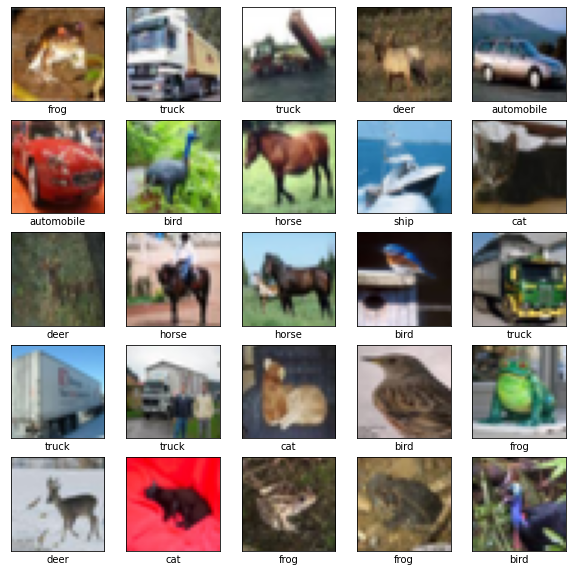

In [17]:
#Visualise the Dataset

# plot a few images
plt.figure(figsize=(10,10))
for i in range(25):
    
    # define subplot
    plt.subplot(5,5,i+1)
    
    # plot raw pixel data
    plt.imshow(train_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names != None:
        # Add a label underneath, if we have one...
        plt.xlabel(class_names[train_labels[i]])
plt.show()

In [22]:
#Prep the data


# Rescale greyscale from 8 bit to floating point (by dividing by 255)
test_images = (test_images0 / 255.0).astype(np.float32)        # 10000 test patterns, shape 10000*32*32*3
train_images = (train_images0 / 255.0).astype(np.float32)      # 50000 train patterns, shape 50000*32*32*3

if len(train_images.shape) == 3:     
    
    # add a single channel to these black-and-white images:
    train_images=train_images.reshape(list(train_images.shape)+[1])
    test_images=test_images.reshape(list(test_images.shape)+[1])
    
    print("Reshaped images from ", train_images0.shape, "to", train_images.shape, "so that 'channel' dimension exists")

num_classification_categories = train_labels.max() + 1


In [23]:
#Define model
# build model with CNN architecture

model = keras.Sequential()

model.add(layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classification_categories, activation='softmax'))


In [24]:
#Model summary

model.build(input_shape=(None,) + train_images.shape[1:])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [25]:
if model.count_params() > 800000 and dataset_name == "cifar10":
    print("The lab7 quiz has a 10MB limit on your model size, so use a smaller model if you want to validate through the auto-marker!")

In [26]:
#Train the network

optimizer = keras.optimizers.Adam()

model.compile(optimizer=optimizer,  
              loss=keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                batch_size=128,
                epochs=10,
                validation_data=(test_images, test_labels))


Epoch 1/10
391/391 [==============================] - 79s 202ms/step - loss: 1.5779 - accuracy: 0.4298 - val_loss: 1.2645 - val_accuracy: 0.5440
Epoch 2/10
391/391 [==============================] - 89s 227ms/step - loss: 1.1533 - accuracy: 0.5904 - val_loss: 1.0065 - val_accuracy: 0.6468
Epoch 3/10
391/391 [==============================] - 86s 219ms/step - loss: 0.9606 - accuracy: 0.6586 - val_loss: 0.9419 - val_accuracy: 0.6738
Epoch 4/10
391/391 [==============================] - 85s 218ms/step - loss: 0.8469 - accuracy: 0.7017 - val_loss: 0.8146 - val_accuracy: 0.7165
Epoch 5/10
391/391 [==============================] - 77s 196ms/step - loss: 0.7578 - accuracy: 0.7338 - val_loss: 0.7952 - val_accuracy: 0.7218
Epoch 6/10
391/391 [==============================] - 62s 158ms/step - loss: 0.6869 - accuracy: 0.7599 - val_loss: 0.7523 - val_accuracy: 0.7386
Epoch 7/10
391/391 [==============================] - 70s 178ms/step - loss: 0.6356 - accuracy: 0.7775 - val_loss: 0.7074 - val_ac

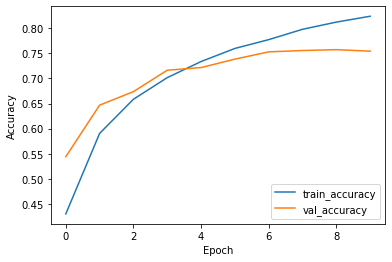

In [27]:
#Plot graph

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

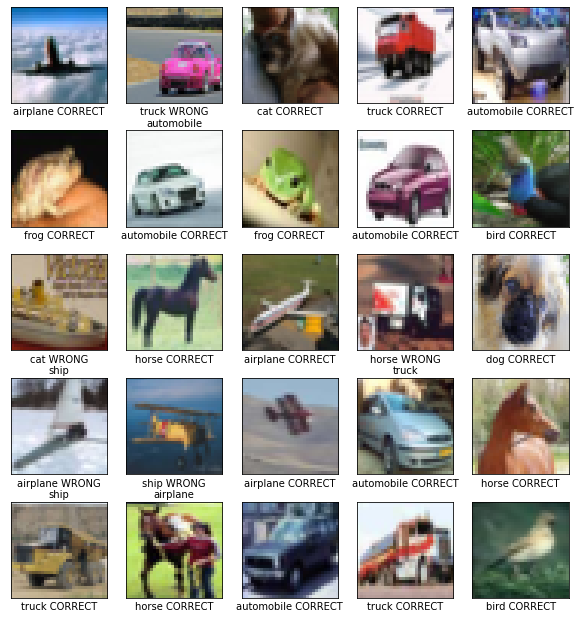

In [28]:
#Inspect

plt.figure(figsize=(10,11))

# plot 25 random images from the test set:
first_index = np.random.randint(len(test_images)-25)

for i in range(first_index,first_index+25):
         # define subplot
    plt.subplot(5,5,i+1-first_index)
         # plot raw pixel data
    plt.imshow(test_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names != None:
              # Add a label underneath, if we have one...
              # array of the probabilities of belonging to each class:
        prediction = model(test_images[i:i+1])[0,:]  
        
              # position of the max probability in the array:
        prediction_class = np.argmax(prediction)   
        
        true_label = test_labels[i]
        class_name = class_names[prediction_class]
        
        plt.xlabel(class_name+" "+("CORRECT" if prediction_class==true_label else "WRONG\n{}".format(class_names[true_label])))
plt.subplots_adjust(hspace=0.2)
plt.show()

In [29]:
#Save the model



Your model is accurate enough!
